# (Py)Torch

Vytvořeno na základě

https://github.com/jeffheaton/app_deep_learning/blob/main/t81_558_class_03_2_pytorch.ipynb

Torch je knihovna, která umožňuje optimalizovat výpočty spojené především s neuronovými sítěmi.
Protože součástí těchto výpočtů jsou vektorové a maticové operace, lze tuto knihovnu využít i pro řešení úloh lineární algebry.

Torch může využít jako procesorového výkonu, tak výkonu dostupného na grafické kartě.


In [2]:
!pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/5b/13/fcabc86948f9e89b62a538670720f8589d63f93d3f4f3d172236a98e70f8/torch-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/81/54/84d42a0bee35edba99dee7b59a8d4970eccdd44b99fe728ed912106fc781/filelock-3.13.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 14.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 10.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 15.6 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for nvidia-cudnn-cu12==8.9.2.26 from https://files.pythonhosted.org/packages/ff/74/a2e2be7fb83aaedec84f391f082cf765dfb635e7caa9b49065f73e4835d8/nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/

In [3]:
import torch

# Make use of a GPU or MPS (Apple) if one is available.
device = (
    "mps"
    if getattr(torch, "has_mps", False)
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using device: {device}")

Using device: cpu


/tmp/ipykernel_12775/845662109.py:6: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  if getattr(torch, "has_mps", False)


## Lineární algebra 

Jak bylo uvedeno výše, lze knihovnu torch využít na výpočty v lineární algebře.

Níže je uveden kód, který vytvoří matice a vypočítá jejich součin. 
Všimněte si konstruktoru matic a nepovinného parametru device.
S jeho pomocí je možné určit, kde výpočet probíhá (pokud máte k dispozici podporovanou grafickou kartu).

In [4]:
# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = torch.tensor([[3.0, 3.0]], device=device)

# Create another Constant that produces a 2x1 matrix.
matrix2 = torch.tensor([[2.0], [2.0]], device=device)

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = torch.mm(matrix1, matrix2)

print(product)
print(float(product))

tensor([[12.]])
12.0


Obdobně lze ralizovat další operace, jako je např. odečítání.

In [6]:
x = torch.tensor([1.0, 2.0], device=device)
a = torch.tensor([3.0, 3.0], device=device)

# Add an op to subtract 'a' from 'x'.  Run it and print the result
sub = torch.subtract(x, a)
print(sub)
# Use cpu() in case tensor was on GPU.
print(sub.cpu().numpy())
# ==> [-2. -1.]

tensor([-2., -1.])
[-2. -1.]


In [7]:
dir(x)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr_

In [4]:
x[0] = 4.0
x[1] = 6.0

In [8]:
sub = torch.subtract(x, a)
print(sub)
print(sub.cpu().numpy())

tensor([-2., -1.])
[-2. -1.]


## Mandelbrotovy množiny

Příklad, který demonstruje využití torch jako knihovny pro rychlé (paralelní) výpočty.

In [9]:
from io import BytesIO

import numpy as np
import PIL.Image
from IPython.display import Image


# Take a NumPy array and render it as a Mandelbrot.
def render(a):
    a_cyclic = (a * 0.3).reshape(list(a.shape) + [1])
    img = np.concatenate(
        [
            10 + 20 * np.cos(a_cyclic),
            30 + 50 * np.sin(a_cyclic),
            155 - 80 * np.cos(a_cyclic),
        ],
        2,
    )
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    return PIL.Image.fromarray(a)


# Loop through the render cycles for. Mandlebrot plot.
def mandelbrot_helper(grid_c, current_values, counts, cycles):
    for i in range(cycles):
        # The Mandlebrot formula
        temp = current_values * current_values + grid_c
        not_diverged = torch.abs(temp) < 4
        current_values.copy_(temp)
        counts.copy_(torch.add(counts, not_diverged.double()))


# Render a Mandelbrot plot at the specified location, zoom, and render cycles.
def mandelbrot(render_size, center, zoom, cycles):
    f = zoom / render_size[0]

    real_start = center[1] - (render_size[1] / 2) * f
    real_end = real_start + render_size[1] * f
    imag_start = center[0] - (render_size[0] / 2) * f
    imag_end = imag_start + render_size[0] * f

    real_range = torch.arange(
        real_start, real_end, f, dtype=torch.float32, device=device
    )
    imag_range = torch.arange(
        imag_start, imag_end, f, dtype=torch.float32, device=device
    )
    real, imag = torch.meshgrid(real_range, imag_range, indexing="ij")
    grid_c = torch.complex(imag, real)
    current_values = torch.clone(grid_c)
    counts = torch.Tensor(torch.zeros_like(grid_c, dtype=torch.float32))

    mandelbrot_helper(grid_c, current_values, counts, cycles)
    return counts.cpu().numpy()

Využití připravených utilit.

(640, 480)


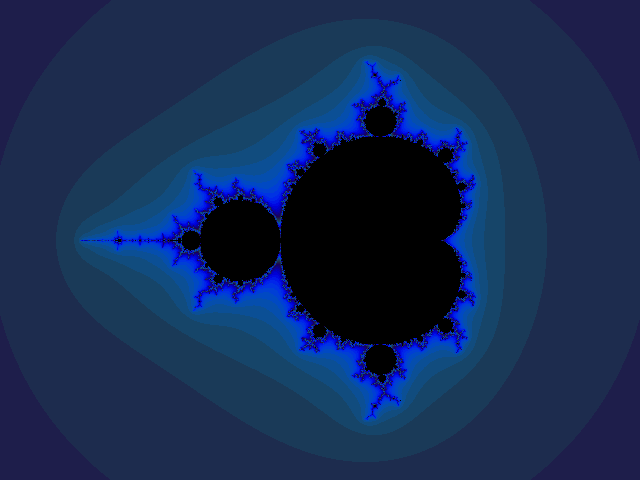

In [10]:
import os

# Pytorch does not currently support complex numbers on MPS
temp_device = device
if device == "mps":
    device = "cpu"

counts = mandelbrot(
    # render_size=(1920,1080), # HD
    render_size=(640, 480),
    center=(-0.5, 0),
    zoom=4,
    cycles=200,
)

img = render(counts)
print(img.size)

# restore device
device = temp_device

# display image
img

## Jednoduchá NN 

### Raw (surová data)

In [83]:
import aiohttp
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

async with aiohttp.ClientSession() as session:
    async with session.get(url) as resp:
        # print(resp.status)
        textresponse = await resp.text()
print(textresponse[:1000])

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"
15.0   8   383.0      170.0      3563.      10.0   70  1	"dodge challenger se"
14.0   8   340.0      160.0      3609.       8.0   70  1	"plymouth 'cuda 340"
15.0   8   400.0      150.0      3761.       9.5   70  1	"chevrolet monte ca

### Reformat

In [84]:
import re
textresponse = re.sub(' +', ' ', textresponse)
textresponse = re.sub('\t', ' ', textresponse)
print(textresponse[:1000])

18.0 8 307.0 130.0 3504. 12.0 70 1 "chevrolet chevelle malibu"
15.0 8 350.0 165.0 3693. 11.5 70 1 "buick skylark 320"
18.0 8 318.0 150.0 3436. 11.0 70 1 "plymouth satellite"
16.0 8 304.0 150.0 3433. 12.0 70 1 "amc rebel sst"
17.0 8 302.0 140.0 3449. 10.5 70 1 "ford torino"
15.0 8 429.0 198.0 4341. 10.0 70 1 "ford galaxie 500"
14.0 8 454.0 220.0 4354. 9.0 70 1 "chevrolet impala"
14.0 8 440.0 215.0 4312. 8.5 70 1 "plymouth fury iii"
14.0 8 455.0 225.0 4425. 10.0 70 1 "pontiac catalina"
15.0 8 390.0 190.0 3850. 8.5 70 1 "amc ambassador dpl"
15.0 8 383.0 170.0 3563. 10.0 70 1 "dodge challenger se"
14.0 8 340.0 160.0 3609. 8.0 70 1 "plymouth 'cuda 340"
15.0 8 400.0 150.0 3761. 9.5 70 1 "chevrolet monte carlo"
14.0 8 455.0 225.0 3086. 10.0 70 1 "buick estate wagon (sw)"
24.0 4 113.0 95.00 2372. 15.0 70 3 "toyota corona mark ii"
22.0 6 198.0 95.00 2833. 15.5 70 1 "plymouth duster"
18.0 6 199.0 97.00 2774. 15.5 70 1 "amc hornet"
21.0 6 200.0 85.00 2587. 16.0 70 1 "ford maverick"
27.0 4 97.00 8

### Načtení do Pandas

In [85]:
import pandas as pd
from io import StringIO 

pd.set_option("display.max_columns", 7)
df = pd.read_csv(
        StringIO(textresponse), sep=" ", 
        names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin", "name"],
        na_values=["NA", "?"]
)
df

,mpg,cylinders,displacement,...,year,origin,name
0,18.0,8,307.0,...,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,...,70,1,buick skylark 320
2,18.0,8,318.0,...,70,1,plymouth satellite
3,16.0,8,304.0,...,70,1,amc rebel sst
4,17.0,8,302.0,...,70,1,ford torino
...,...,...,...,...,...,...,...
393,27.0,4,140.0,...,82,1,ford mustang gl
394,44.0,4,97.0,...,82,2,vw pickup
395,32.0,4,135.0,...,82,1,dodge rampage
396,28.0,4,120.0,...,82,1,ford ranger


In [86]:
cars = df["name"]

# Handle missing value
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

In [87]:
# Pandas to Numpy
x = df[
    [
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
        "origin",
    ]
].values
y = df["mpg"].values  # regression

In [18]:
x, y

(array([[  8. , 307. , 130. , ...,  12. ,  70. ,   1. ],
        [  8. , 350. , 165. , ...,  11.5,  70. ,   1. ],
        [  8. , 318. , 150. , ...,  11. ,  70. ,   1. ],
        ...,
        [  4. , 135. ,  84. , ...,  11.6,  82. ,   1. ],
        [  4. , 120. ,  79. , ...,  18.6,  82. ,   1. ],
        [  4. , 119. ,  82. , ...,  19.4,  82. ,   1. ]]),
 array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
        14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
        25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
        19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
        13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
        27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
        17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
        22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
        14. , 15. , 12. , 13. , 13. , 14. , 13. , 1

In [17]:
# Numpy to PyTorch
x = torch.tensor(x, device=device, dtype=torch.float32)
y = torch.tensor(y, device=device, dtype=torch.float32)

In [20]:
x, y

(tensor([[  8.0000, 307.0000, 130.0000,  ...,  12.0000,  70.0000,   1.0000],
         [  8.0000, 350.0000, 165.0000,  ...,  11.5000,  70.0000,   1.0000],
         [  8.0000, 318.0000, 150.0000,  ...,  11.0000,  70.0000,   1.0000],
         ...,
         [  4.0000, 135.0000,  84.0000,  ...,  11.6000,  82.0000,   1.0000],
         [  4.0000, 120.0000,  79.0000,  ...,  18.6000,  82.0000,   1.0000],
         [  4.0000, 119.0000,  82.0000,  ...,  19.4000,  82.0000,   1.0000]]),
 tensor([18.0000, 15.0000, 18.0000, 16.0000, 17.0000, 15.0000, 14.0000, 14.0000,
         14.0000, 15.0000, 15.0000, 14.0000, 15.0000, 14.0000, 24.0000, 22.0000,
         18.0000, 21.0000, 27.0000, 26.0000, 25.0000, 24.0000, 25.0000, 26.0000,
         21.0000, 10.0000, 10.0000, 11.0000,  9.0000, 27.0000, 28.0000, 25.0000,
         25.0000, 19.0000, 16.0000, 17.0000, 19.0000, 18.0000, 14.0000, 14.0000,
         14.0000, 14.0000, 12.0000, 13.0000, 13.0000, 18.0000, 22.0000, 19.0000,
         18.0000, 23.0000, 28.0000, 

In [19]:
import torch.nn as nn

# Create the neural network
model = nn.Sequential(
    nn.Linear(x.shape[1], 50),
    nn.ReLU(),
    nn.Linear(50, 25),
    nn.ReLU(),
    nn.Linear(25, 1)
)

# PyTorch 2.0 Model Compile (improved performance)
model = torch.compile(model,backend="aot_eager").to(device)

# Define the loss function for regression
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [20]:
# Train for 1000 epochs.
for epoch in range(1000):
    optimizer.zero_grad()
    out = model(x).flatten()
    loss = loss_fn(out, y)
    loss.backward()
    optimizer.step()

    # Display status every 100 epochs.
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss: {loss.item()}")

Epoch 0, loss: 169.18772888183594
Epoch 100, loss: 143.01742553710938
Epoch 200, loss: 56.95899963378906
Epoch 300, loss: 29.553804397583008
Epoch 400, loss: 19.791318893432617
Epoch 500, loss: 14.686964988708496
Epoch 600, loss: 12.97624397277832
Epoch 700, loss: 12.466663360595703
Epoch 800, loss: 12.265033721923828
Epoch 900, loss: 12.144697189331055


In [22]:
pred = model(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: torch.Size([398, 1])
tensor([[16.4080],
        [15.2315],
        [16.7378],
        [16.9201],
        [16.3493],
        [10.6254],
        [10.4705],
        [10.5166],
        [10.2304],
        [13.5510]], grad_fn=<SliceBackward0>)


In [23]:
from sklearn import metrics

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred.cpu().detach(), y.cpu().detach()))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 3.470184564590454


In [26]:
score = torch.sqrt(torch.nn.functional.mse_loss(pred.flatten(), y))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 3.027055501937866


In [27]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Car name: {cars[i]}, MPG: {y[i]}, " + f"predicted MPG: {pred[i]}")

1. Car name: chevrolet chevelle malibu, MPG: 18.0, predicted MPG: tensor([16.3430], grad_fn=<SelectBackward0>)
2. Car name: buick skylark 320, MPG: 15.0, predicted MPG: tensor([15.3251], grad_fn=<SelectBackward0>)
3. Car name: plymouth satellite, MPG: 18.0, predicted MPG: tensor([16.3649], grad_fn=<SelectBackward0>)
4. Car name: amc rebel sst, MPG: 16.0, predicted MPG: tensor([16.3416], grad_fn=<SelectBackward0>)
5. Car name: ford torino, MPG: 17.0, predicted MPG: tensor([16.1758], grad_fn=<SelectBackward0>)
6. Car name: ford galaxie 500, MPG: 15.0, predicted MPG: tensor([12.3560], grad_fn=<SelectBackward0>)
7. Car name: chevrolet impala, MPG: 14.0, predicted MPG: tensor([12.1224], grad_fn=<SelectBackward0>)
8. Car name: plymouth fury iii, MPG: 14.0, predicted MPG: tensor([12.1567], grad_fn=<SelectBackward0>)
9. Car name: pontiac catalina, MPG: 14.0, predicted MPG: tensor([11.8439], grad_fn=<SelectBackward0>)
10. Car name: amc ambassador dpl, MPG: 15.0, predicted MPG: tensor([14.2244],

## Iris dataset

In [25]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

In [26]:
def namedata(data):
    return {
        'sepal_l': data[0],
        'sepal_w': data[1],
        'petal_l': data[2],
        'petal_w': data[3]
    }

table = list(map(namedata, iris.data))
table

[{'sepal_l': 5.1, 'sepal_w': 3.5, 'petal_l': 1.4, 'petal_w': 0.2},
 {'sepal_l': 4.9, 'sepal_w': 3.0, 'petal_l': 1.4, 'petal_w': 0.2},
 {'sepal_l': 4.7, 'sepal_w': 3.2, 'petal_l': 1.3, 'petal_w': 0.2},
 {'sepal_l': 4.6, 'sepal_w': 3.1, 'petal_l': 1.5, 'petal_w': 0.2},
 {'sepal_l': 5.0, 'sepal_w': 3.6, 'petal_l': 1.4, 'petal_w': 0.2},
 {'sepal_l': 5.4, 'sepal_w': 3.9, 'petal_l': 1.7, 'petal_w': 0.4},
 {'sepal_l': 4.6, 'sepal_w': 3.4, 'petal_l': 1.4, 'petal_w': 0.3},
 {'sepal_l': 5.0, 'sepal_w': 3.4, 'petal_l': 1.5, 'petal_w': 0.2},
 {'sepal_l': 4.4, 'sepal_w': 2.9, 'petal_l': 1.4, 'petal_w': 0.2},
 {'sepal_l': 4.9, 'sepal_w': 3.1, 'petal_l': 1.5, 'petal_w': 0.1},
 {'sepal_l': 5.4, 'sepal_w': 3.7, 'petal_l': 1.5, 'petal_w': 0.2},
 {'sepal_l': 4.8, 'sepal_w': 3.4, 'petal_l': 1.6, 'petal_w': 0.2},
 {'sepal_l': 4.8, 'sepal_w': 3.0, 'petal_l': 1.4, 'petal_w': 0.1},
 {'sepal_l': 4.3, 'sepal_w': 3.0, 'petal_l': 1.1, 'petal_w': 0.1},
 {'sepal_l': 5.8, 'sepal_w': 4.0, 'petal_l': 1.2, 'petal_w': 0

In [27]:
tmap = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
targets = list(map(lambda item: tmap[item], iris.target))

In [31]:
table = [{**row, 'species': name} for row, name in zip(table, targets)]

In [32]:
import pandas as pd
df = pd.DataFrame(table)
df

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

x = df[["sepal_l", "sepal_w", "petal_l", "petal_w"]].values
y = le.fit_transform(df["species"])

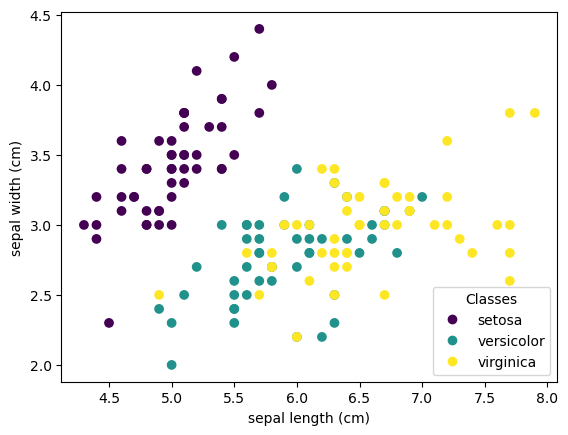

In [63]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [64]:
print(y)
print(x)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

In [65]:
species = le.classes_
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [66]:
import torch
import torch.nn as nn

x = torch.tensor(x, device=device, dtype=torch.float32)
y = torch.tensor(y, device=device, dtype=torch.long)

l1 = nn.Linear(x.shape[1], 50)
l2 = nn.ReLU()
l3 = nn.Linear(50, 25)
l4 = nn.ReLU()
l5 = nn.Linear(25, len(species))
l6 = nn.LogSoftmax(dim=1)

model = nn.Sequential(
    l1,
    l2,
    l3,
    l4,
    l5,
    l6
)

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html

https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html

In [67]:
# PyTorch 2.0 Model Compile (improved performance)
model = torch.compile(model,backend="aot_eager").to(device)

criterion = nn.CrossEntropyLoss()  # cross entropy loss

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    out = model(x)
    # Note: CrossEntropyLoss combines nn.LogSoftmax() and nn.NLLLoss() so don't use Softmax in the model
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss: {loss.item()}")

Epoch 0, loss: 1.2552812099456787
Epoch 100, loss: 0.0508430115878582
Epoch 200, loss: 0.047021862119436264
Epoch 300, loss: 0.04056144878268242
Epoch 400, loss: 0.0388239361345768
Epoch 500, loss: 0.03740832209587097
Epoch 600, loss: 0.03613429516553879
Epoch 700, loss: 0.034737687557935715
Epoch 800, loss: 0.03361916542053223
Epoch 900, loss: 0.031136073172092438


In [68]:
model.eval()
pred = model(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: torch.Size([150, 3])
tensor([[-8.8214e-06, -1.1633e+01, -4.4876e+01],
        [-3.6120e-05, -1.0228e+01, -4.0428e+01],
        [-2.1934e-05, -1.0725e+01, -4.1684e+01],
        [-7.2834e-05, -9.5269e+00, -3.9743e+01],
        [-9.0599e-06, -1.1613e+01, -4.5243e+01],
        [-1.2875e-05, -1.1262e+01, -4.6198e+01],
        [-2.9563e-05, -1.0430e+01, -4.1830e+01],
        [-1.9073e-05, -1.0866e+01, -4.3380e+01],
        [-9.9892e-05, -9.2113e+00, -3.8014e+01],
        [-4.1126e-05, -1.0098e+01, -4.1302e+01]], grad_fn=<SliceBackward0>)


In [69]:
print(pred[0:10].cpu().detach().numpy())

[[-8.82144832e-06 -1.16325569e+01 -4.48764114e+01]
 [-3.61197635e-05 -1.02279148e+01 -4.04283524e+01]
 [-2.19342692e-05 -1.07254124e+01 -4.16835632e+01]
 [-7.28342202e-05 -9.52690315e+00 -3.97430191e+01]
 [-9.05986508e-06 -1.16125269e+01 -4.52426910e+01]
 [-1.28745205e-05 -1.12618170e+01 -4.61979561e+01]
 [-2.95634673e-05 -1.04304132e+01 -4.18300171e+01]
 [-1.90733044e-05 -1.08661175e+01 -4.33800316e+01]
 [-9.98923933e-05 -9.21131420e+00 -3.80142899e+01]
 [-4.11263609e-05 -1.00978985e+01 -4.13023567e+01]]


In [70]:
print(pred[:-10].cpu().detach().numpy())

[[-8.82144832e-06 -1.16325569e+01 -4.48764114e+01]
 [-3.61197635e-05 -1.02279148e+01 -4.04283524e+01]
 [-2.19342692e-05 -1.07254124e+01 -4.16835632e+01]
 [-7.28342202e-05 -9.52690315e+00 -3.97430191e+01]
 [-9.05986508e-06 -1.16125269e+01 -4.52426910e+01]
 [-1.28745205e-05 -1.12618170e+01 -4.61979561e+01]
 [-2.95634673e-05 -1.04304132e+01 -4.18300171e+01]
 [-1.90733044e-05 -1.08661175e+01 -4.33800316e+01]
 [-9.98923933e-05 -9.21131420e+00 -3.80142899e+01]
 [-4.11263609e-05 -1.00978985e+01 -4.13023567e+01]
 [-5.36440348e-06 -1.21390200e+01 -4.69526215e+01]
 [-4.54177061e-05 -1.00003347e+01 -4.21810341e+01]
 [-3.93382907e-05 -1.01439981e+01 -4.06460800e+01]
 [-2.98018786e-05 -1.04191570e+01 -4.01357269e+01]
 [-4.76837045e-07 -1.46392698e+01 -5.18066483e+01]
 [-9.53673862e-07 -1.38892097e+01 -5.18822937e+01]
 [-1.90734681e-06 -1.31738310e+01 -4.81607895e+01]
 [-9.53669769e-06 -1.15585566e+01 -4.43206825e+01]
 [-8.10619895e-06 -1.17226152e+01 -4.70958443e+01]
 [-8.34461571e-06 -1.16906109e+

In [71]:
_, predict_classes = torch.max(pred, 1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {y}")
print(f"values: {_}")

Predictions: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])
Expected: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [72]:
print(species[predict_classes])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

Na základě srovnání predikce na trénovací množině a známých hodnot lze stanovit přesnost odhadu získané neuronové sítě.

In [73]:
from sklearn.metrics import accuracy_score

correct = accuracy_score(y, predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.9866666666666667


Získanou neuronovou síť lze využít k predikci na základě hodnot, které nejsou součástí trénovací množiny.


In [74]:
sample_flower = torch.tensor([[5.0, 3.0, 4.0, 2.0]])
pred = model(sample_flower)
print(pred)
_, predict_classes = torch.max(pred, 1)
print(f"Predict that {sample_flower} is: {species[predict_classes]}")

tensor([[-12.0721,  -0.2882,  -1.3846]], grad_fn=<CompiledFunctionBackward>)
Predict that tensor([[5., 3., 4., 2.]]) is: Iris-versicolor


In [54]:
x[0]

tensor([5.1000, 3.5000, 1.4000, 0.2000])

In [78]:
r1=l1(x[0])
r1

tensor([-3.5794, -1.3292, -0.6540, -0.0726,  5.3868, -0.1148,  2.7516,  4.2517,
        -0.2502,  0.5854, -1.8840, -0.6969,  6.0261, -1.2417, -0.8417, -1.9513,
         2.7595,  3.3550,  1.7921, -2.2376,  3.3755, -0.7732, -0.4908, -1.1727,
        -2.5068,  4.8974, -1.8502, -0.1860,  4.5376, -1.0693, -1.6631, -0.3468,
         1.5429, -0.0232,  3.5676,  3.9476, -0.1587, -0.8446,  5.6858,  5.8084,
        -0.0710, -2.3748, -1.9315,  3.6341, -4.7536,  4.8894, -1.0658, -0.1738,
        -0.3814, -1.4308], grad_fn=<AddBackward0>)

In [79]:
r2=l2(r1)
r2

tensor([0.0000, 0.0000, 0.0000, 0.0000, 5.3868, 0.0000, 2.7516, 4.2517, 0.0000,
        0.5854, 0.0000, 0.0000, 6.0261, 0.0000, 0.0000, 0.0000, 2.7595, 3.3550,
        1.7921, 0.0000, 3.3755, 0.0000, 0.0000, 0.0000, 0.0000, 4.8974, 0.0000,
        0.0000, 4.5376, 0.0000, 0.0000, 0.0000, 1.5429, 0.0000, 3.5676, 3.9476,
        0.0000, 0.0000, 5.6858, 5.8084, 0.0000, 0.0000, 0.0000, 3.6341, 0.0000,
        4.8894, 0.0000, 0.0000, 0.0000, 0.0000], grad_fn=<ReluBackward0>)

In [80]:
r3=l3(r2)
r3

tensor([-12.9384,  -0.4247,  -2.1477,  -1.4565,  -4.4639, -10.7272,  -2.1609,
         -0.6912,  -3.0923,  -0.5028,  -1.2763,  -0.9008,  -1.7361,  -1.1643,
         -0.3646,  -0.9572,  -3.6421,  -2.4248,  -4.4273,  26.4797,  15.7494,
         -0.6052,  16.5467,  -1.1520, -25.5868], grad_fn=<ViewBackward0>)

In [81]:
r4=l4(r3)
r4

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000, 26.4797, 15.7494,  0.0000, 16.5467,  0.0000,
         0.0000], grad_fn=<ReluBackward0>)

In [82]:
r5=l5(r4)
r5

tensor([ 19.8258,   8.1932, -25.0506], grad_fn=<ViewBackward0>)

In [77]:
r6=l6(r5)
r6

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [37]:
targets

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',


In [36]:
len(iris.target)

150